### Import Libraries and dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [4]:
%matplotlib inline

In [5]:
# Define path

path = '/Users/lechu/Desktop/Task_6'

In [6]:
# Import data

df = pd.read_csv(os.path.join(path,'PreparedData', 'case_vaccination_combined.csv'),index_col = False)

In [7]:
df.columns

Index(['Unnamed: 0', 'date', 'cases', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations'],
      dtype='object')

In [8]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [9]:
df.tail()

,date,cases,people_vaccinated,people_fully_vaccinated,daily_vaccinations
517,2021-06-23,1135.0,44113902.0,28120827.0,847607.0
518,2021-06-24,475.0,44648853.0,28667869.0,831545.0
519,2021-06-25,751.0,45074295.0,29208662.0,821290.0
520,2021-06-26,488.0,45225940.0,29482055.0,818832.0
521,2021-06-27,336.0,45320460.0,29684139.0,818388.0


In [10]:
df.isnull().sum()

date                         0
cases                        0
people_vaccinated            0
people_fully_vaccinated      0
daily_vaccinations         339
dtype: int64

In [11]:
df.dropna(inplace = True)


In [12]:
df.drop(columns=['date'],inplace = True)

In [13]:
df.drop(columns=['Case category'],inplace = True)

KeyError: "['Case category'] not found in axis"

### The elbow technique 

In [14]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [15]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [16]:
score

[-5.127788995615601e+16,
 -1.0334450371065856e+16,
 -4832619067641442.0,
 -2690294320387552.0,
 -1677907549637310.5,
 -1122936961226043.2,
 -840978304204953.4,
 -668530167480983.4,
 -502409587269728.25]

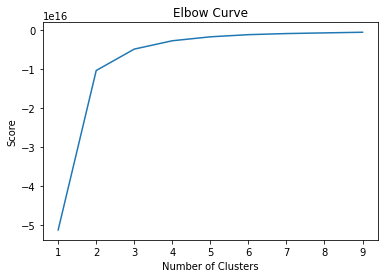

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Here the curve jumps rapidly from two to three on the x-axis, then rises only slightly after three, so the optimal count for cluster is 3

### k-means clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/lechu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [20]:
df['clusters'] = kmeans.fit_predict(df)

/Users/lechu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [21]:
df.head()

,cases,people_vaccinated,people_fully_vaccinated,daily_vaccinations,clusters
339,12399.0,24356.0,19.0,0.0,1
340,14004.0,42390.0,83.0,18098.0,1
341,19466.0,92439.0,735.0,34400.0,1
342,49044.0,156605.0,769.0,44333.0,1
343,19367.0,206534.0,856.0,45754.0,1


In [22]:
df['clusters'].value_counts()

1    108
0     42
2     33
Name: clusters, dtype: int64

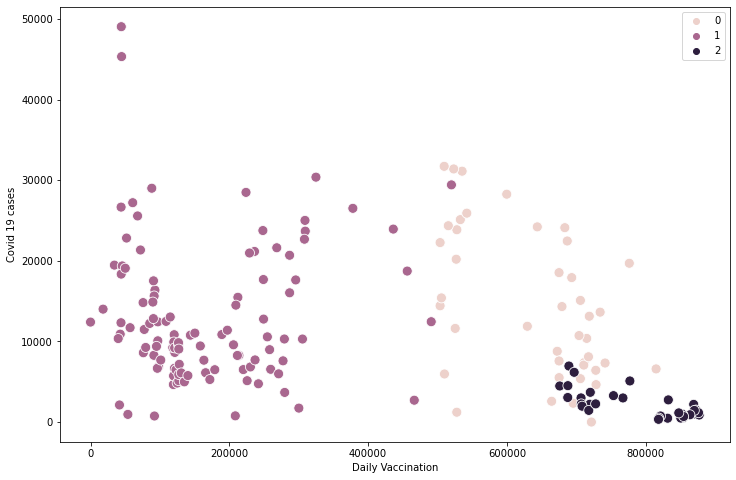

In [23]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['daily_vaccinations'], y=df['cases'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Daily Vaccination') 
plt.ylabel('Covid 19 cases') 
plt.show()

In [24]:
ax.savefig(os.path.join(path, 'Visualization','cluster.png'))

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

Text(0, 0.5, 'Covid 19 cases')

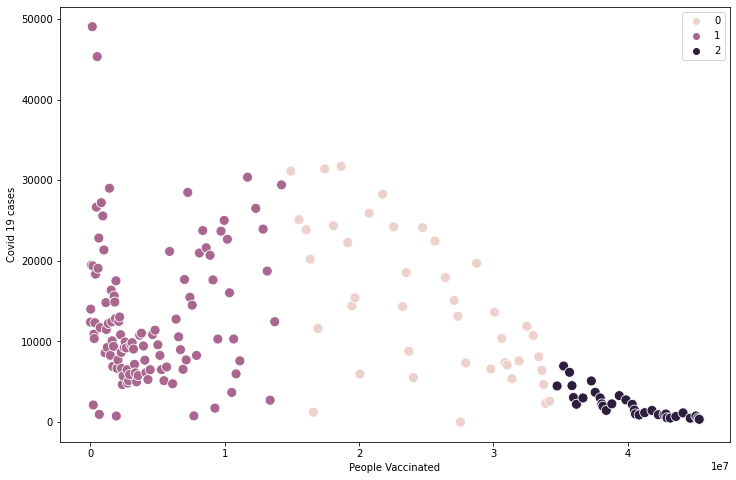

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['people_vaccinated'], y=df['cases'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('People Vaccinated') 
plt.ylabel('Covid 19 cases') 


Text(0, 0.5, 'Covid 19 cases')

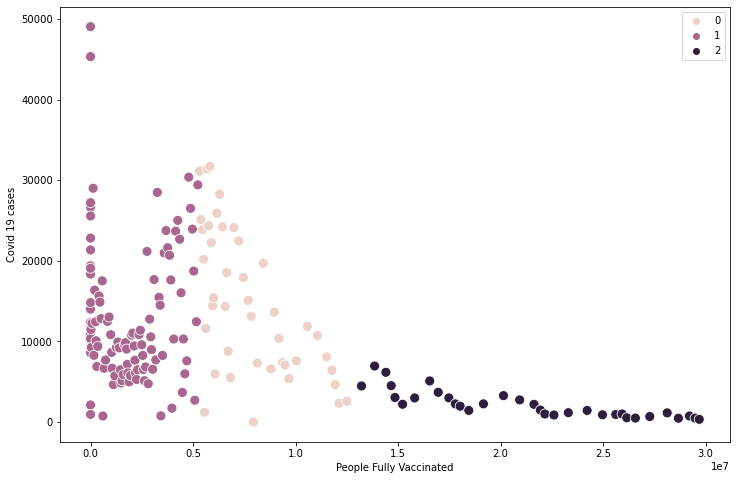

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['people_fully_vaccinated'], y=df['cases'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('People Fully Vaccinated') 
plt.ylabel('Covid 19 cases') 


From the above plots we can say that as the vaccination rate increases then the covid 19 cases decreases.

In [27]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [28]:
df_cluster= df.groupby('cluster').agg({'cases':['mean', 'median'], 
                         'daily_vaccinations':['mean', 'median'], 
                         'people_fully_vaccinated':['mean', 'median'],
                          'people_vaccinated':['mean', 'median']})

The dark purple cluster has the best stats in almost all categories. The median cases  is 1484, which is significantly lower than the other two. 


In [31]:
df_cluster
# df_cluster.plot.bar(x = 'cluster', y = 'Mean', fontsize='9')

cases          daily_vaccinations            \
                     mean   median               mean    median   
cluster                                                           
dark purple   2179.424242   1484.0      790212.151515  818832.0   
pink         14489.119048  13378.0      640409.404762  675145.5   
purple       13035.046296  10671.0      168165.675926  127229.0   

            people_fully_vaccinated             people_vaccinated              
                               mean      median              mean      median  
cluster                                                                        
dark purple            2.136233e+07  21626158.0      4.009136e+07  40335299.0  
pink                   7.818179e+06   7106581.5      2.510156e+07  25196409.5  
purple                 1.911879e+06   1731659.5      4.534182e+06   3172606.5

In [36]:
df_cluster.to_csv(os.path.join(path,'PreparedData', 'cluster.csv'))

<AxesSubplot:xlabel='cluster'>

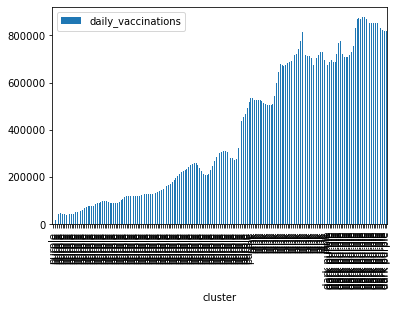

In [35]:
df.plot.bar(x = 'cluster', y = 'daily_vaccinations')